# **Part 1 - Neural Net Weighting on NHL Entry Draft**

---


**Phase 1 - Data Import**

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlrose
import timeit
plt.rcParams['figure.figsize'] = [10,7]
sns.set()

SEED = 1

#import data and create X & y sets
df = pd.read_csv('Hockey.csv', encoding = "ISO-8859-1")

**Phase 2 - Data Preprocessing**

---



In [26]:
#create dummy variables for all categorical variables
#df_d = pd.get_dummies(df)
y = df.iloc[:,0]
X = df.iloc[:,2:]
X.shape

(559, 23)

In [27]:
#create correlation matrix for all 53 variables to see if there are obvious features that can be dropped
corr = df.corr()
corr.style.background_gradient()

In [28]:
#rget rid of three extremely uncorrelated features
df = df.drop(['TotalQOC', 'Top10Team', 'Import'], axis=1)
y = df.iloc[:,0]
X = df.iloc[:,2:]
X.head()

P/G     RelPM  Ht   TeamStr       TOI   2ndAss%       G:A  Overage?  \
0  1.828379 -0.009524  72  0.473333  0.450000  0.182692  0.557692         0   
1  1.634882  0.095210  73  0.563636  0.523636  0.169811  0.452830         0   
2  1.688586  0.065657  73  0.501792  0.418826  0.171429  0.552381         0   
3  1.526397 -0.032070  74  0.562130  0.444037  0.160000  0.408000         0   
4  2.272272  0.138445  70  0.549451  0.513831  0.241379  0.427586         0   

   Weight  AgeInMonths  TeamForwardPointRank  Top5Team       IPP  PercentTO  \
0     198          228                   1.0         0  0.781818   0.302817   
1     186          224                   1.0         1  0.792208   0.393548   
2     180          223                   1.0         1  0.839286   0.335714   
3     198          216                   1.0         0  0.810127   0.336842   
4     170          226                   1.0         1  0.820513   0.426667   

   TotalQOT   OIGwTop  TopPlayer  GFDifferential  PPGRelativeToLead  DraftYear  
0  0.307920  1.122449          0        0.044135                1.0       2009  
1  0.287225  1.000000          1        0.087621                1.0       2010  
2  0.358487  1.000000          1        0.098990                1.0       2008  
3  0.286386  1.000000          1       -0.050427                1.0       1997  
4  0.444617  1.000000          1        0.240265                1.0       2007

In [29]:
#validate the new correlation matrix to ensure relevancy of remaining features versus response 
corr = df.corr()
corr.style.background_gradient()

In [30]:
#split data into 85% train, 15% test
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)

from sklearn.preprocessing import StandardScaler

#instantiate a scalar
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 1.31838575,  0.80457138, -1.11915977, ...,  1.02280241,
         1.33552311, -1.22427349],
       [ 0.62864673,  1.65683705, -0.08087678, ...,  1.87833628,
         0.04172265, -1.72322664],
       [ 1.8482543 , -0.67516684,  0.43826471, ..., -0.87809362,
         1.38389658, -1.72322664],
       ...,
       [ 0.37878164, -1.06701461,  1.47654771, ..., -1.57500808,
         0.74045376,  1.51996888],
       [-1.85911735, -3.55875233,  1.9956892 , ..., -3.40568934,
        -1.71658081,  1.27049231],
       [ 1.19249867,  2.37141158,  0.43826471, ...,  1.96111513,
         0.33841663,  0.02310941]])

In [31]:
np.random.seed(1)
a, b, c, d, e = np.split(X_train_scale, [int(.2*len(X_train_scale)),int(.4*len(X_train_scale)),int(.6*len(X_train_scale)),int(.8*len(X_train_scale))])
folds = [a, b, c, d, e]
folds

np.random.seed(1)
ay, by, cy, dy, ey = np.split(y_train, [int(.2*len(y_train)),int(.4*len(y_train)),int(.6*len(y_train)),int(.8*len(y_train))])
yfolds = [ay, by, cy, dy, ey]
yfolds

[247    0
 496    0
 3      1
 68     0
 133    0
 308    0
 201    0
 4      1
 407    0
 373    0
 552    0
 117    0
 19     1
 124    1
 172    0
 241    0
 267    0
 295    0
 78     0
 394    0
 446    0
 344    0
 363    0
 42     0
 147    0
 180    0
 5      1
 482    1
 189    1
 502    0
       ..
 6      1
 370    0
 11     1
 257    0
 186    0
 223    0
 58     1
 460    0
 519    0
 365    0
 246    0
 179    0
 101    1
 187    0
 505    0
 379    0
 306    0
 18     1
 517    0
 121    0
 409    0
 436    0
 347    0
 556    0
 472    0
 80     0
 46     1
 430    0
 242    0
 93     0
 Name: MakeNHL, Length: 95, dtype: int64, 462    0
 81     0
 532    0
 449    0
 328    0
 115    0
 386    0
 366    0
 469    0
 450    0
 283    0
 139    0
 106    1
 224    0
 511    0
 88     0
 185    0
 318    0
 498    0
 335    0
 95     1
 122    0
 362    0
 447    0
 23     1
 164    0
 13     1
 415    0
 61     1
 412    0
       ..
 125    1
 294    0
 542    0
 439    0

In [103]:
def size_sample(size=1.0):
    np.random.seed(1)
    x, _ = np.split(X_train_scale, [int(size*len(X_train_scale))])
    np.random.seed(1)
    a, b, c, d, e = np.split(x, [int(.2*len(x)),int(.4*len(x)),int(.6*len(x)),int(.8*len(x))])
    folds = [a, b, c, d, e]

    np.random.seed(1)
    y, _ = np.split(y_train, [int(size*len(y_train))])
    np.random.seed(1)
    ay, by, cy, dy, ey = np.split(y, [int(.2*len(y)),int(.4*len(y)),int(.6*len(y)),int(.8*len(y))])
    yfolds = [ay, by, cy, dy, ey]
    return folds, yfolds
    

In [10]:
#create function to visualize confusion matrix
# from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [11]:
print(__doc__)

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


3D surface (color map)

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444



**Phase 3 - Neural Networks**

---



In [98]:
#Neural Network------------------------------------------------------
from sklearn.neural_network import MLPClassifier

#create gridSearch parameters
parameters = {'solver': ['lbfgs'], 'max_iter': [10,25,50,100,175,250], 'alpha': [4], 'hidden_layer_sizes':[10,25,40,100]}

#run GridSearch to optimize parameters
clf = GridSearchCV(MLPClassifier(random_state=SEED), param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=3)
clf.fit(X_train_scale,y_train)

#extract the best params from 'clf'
best_hyperparams = clf.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = clf.best_score_
print(best_CV_score)

#extract best model from clf
best_nn = clf.best_estimator_

#Fit the model to the data
best = best_nn.fit(X_train_scale,y_train)

#make predictions on test data
y_pred = best.predict(X_test_scale)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 120 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.9s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 4, 'hidden_layer_sizes': 40, 'max_iter': 175, 'solver': 'lbfgs'}
0.5003419660261766


Hockey - Random Hill Climbing

In [42]:
# Initialize neural network object and fit object - random hill climbing WITH CV

np.random.seed(1)
best = 0.0
f1 = 0.0
besti = 0
bestj=0
bestk=0
bestl=0
results = []

for i in np.linspace(30,30,1,dtype='int').tolist():
    #print(i)
    for j in np.linspace(0.013375,2.113375,22):

        for k in np.linspace(40,720,18,dtype='int').tolist():

            for l in np.linspace(18,18,1,dtype='int').tolist():
                f1 = 0
                for a, (f,g) in enumerate(zip(folds,yfolds)):

                    b = [x for b,x in enumerate(folds) if b!=a]
                    c = [p for c,p in enumerate(yfolds) if c!=a]
                    train_folds = np.vstack(b)
                    ytrain_folds = np.hstack(c)


                    np.random.seed(1)
                    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [i], activation ='relu', 
                                                     algorithm ='random_hill_climb', 
                                                     max_iters = k, bias = True, is_classifier = True, 
                                                     learning_rate = j, early_stopping = True, 
                                                     clip_max = 5, max_attempts = l)

                    nn_model1.fit(train_folds, ytrain_folds)

                    # Predict labels for train set and assess accuracy
                    y_train_pred = nn_model1.predict(train_folds)

                    y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
                    y_train_f1 = f1_score(ytrain_folds, y_train_pred)

                    #print(y_train_accuracy)
                    #print(y_train_f1)

                    # Predict labels for test set and assess accuracy
                    y_test_pred = nn_model1.predict(f)

                    y_test_accuracy = accuracy_score(g, y_test_pred)
                    y_test_f1 = f1_score(g, y_test_pred)
                    f1 = f1+y_test_f1
                f1 = f1/5
                results.append(j)
                results.append(k)
                results.append(f1)
                if f1 > best:
                    best = f1
                    besti = i
                    bestj=j
                    bestk=k
                    bestl=l
                

                    #print(y_test_accuracy)
                    #print(y_test_f1)
print(best)
print(besti)
print(bestj)
print(bestk)
print(bestl)

0.5137198027520609
30
1.513375
320
18


In [43]:
np.random.seed(1)
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [besti], activation ='relu', 
                                                 algorithm ='random_hill_climb', 
                                                 max_iters = bestk, bias = True, is_classifier = True, 
                                                 learning_rate = bestj, early_stopping = True, 
                                                 clip_max = 5, max_attempts = bestl)

start_time = timeit.default_timer()
nn_model1.fit(X_train_scale, y_train)
elapsed = timeit.default_timer() - start_time
print(elapsed)

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scale)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_train_f1 = f1_score(y_train, y_train_pred)

print(y_train_accuracy)
print(y_train_f1)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scale)

y_test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_f1 = f1_score(y_test, y_test_pred)

print(y_test_accuracy)
print(y_test_f1)
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred,digits=3))

0.45731164659673595
0.84
0.4933333333333333
0.8452380952380952
0.48
[[65  4]
 [ 9  6]]
              precision    recall  f1-score   support

           0      0.878     0.942     0.909        69
           1      0.600     0.400     0.480        15

   micro avg      0.845     0.845     0.845        84
   macro avg      0.739     0.671     0.695        84
weighted avg      0.829     0.845     0.832        84



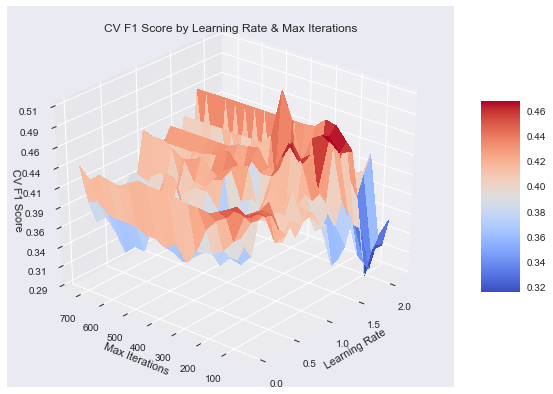

In [19]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = np.array(results[2::3])
X = np.array(results[0::3])
Y = np.array(results[1::3])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by Learning Rate & Max Iterations')
plt.xlabel('Learning Rate')
plt.ylabel('Max Iterations')
ax.view_init(azim=220)

plt.show()

In [130]:
train = []
CV = []
f1 = 0.0
t=0.0

for i in np.linspace(0.1,1,10):
    x_folds, y_folds = size_sample(i)
    t=0.0
    f1 = 0.0
    for a, (f,g) in enumerate(zip(x_folds,y_folds)):

        b = [x for b,x in enumerate(x_folds) if b!=a]
        c = [p for c,p in enumerate(y_folds) if c!=a]
        train_folds = np.vstack(b)
        ytrain_folds = np.hstack(c)


        np.random.seed(1)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                         algorithm ='random_hill_climb', 
                                         max_iters = 320, bias = True, is_classifier = True, 
                                         learning_rate = 1.513375, early_stopping = True, 
                                         clip_max = 5, max_attempts = 18)

        nn_model1.fit(train_folds, ytrain_folds)

        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model1.predict(train_folds)

        y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
        y_train_f1 = f1_score(ytrain_folds, y_train_pred)
        t+=y_train_f1
        #print(y_train_accuracy)
        #print(y_train_f1)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(f)

        y_test_accuracy = accuracy_score(g, y_test_pred)
        y_test_f1 = f1_score(g, y_test_pred)
        f1 = f1+y_test_f1
    f1 = f1/5
    t/=5
    #print(f1)
    x_train_folds = np.vstack(x_folds)
    #print(x_train_folds)
    y_train_folds = np.hstack(y_folds)
    #print(y_train_folds)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                     algorithm ='random_hill_climb', 
                                     max_iters = 320, bias = True, is_classifier = True, 
                                     learning_rate = 1.513375, early_stopping = True, 
                                     clip_max = 5, max_attempts = 18)

    nn_model1.fit(x_train_folds, y_train_folds)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(x_train_folds)
    y_train_f1 = f1_score(y_train_folds, y_train_pred)
    train.append(t)
    CV.append(f1)
CV

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.35714285714285715,
 0.580952380952381,
 0.4970695970695971,
 0.4508771929824561,
 0.3492857142857143,
 0.3991835357624831,
 0.38962041467304626,
 0.3582564102564102,
 0.3273088023088023,
 0.5137198027520609]

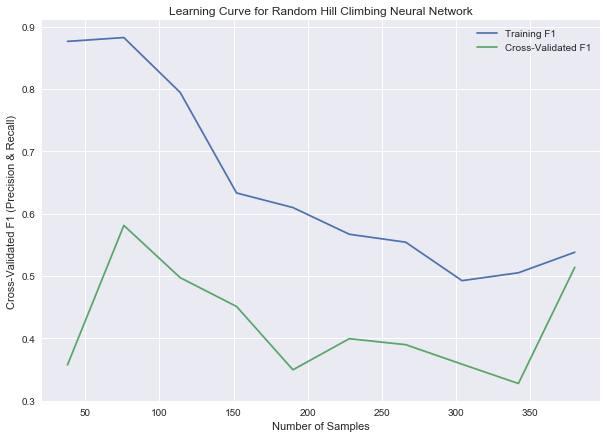

In [131]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [int(ytrain_folds.size * i) for i in np.linspace(0.1,1,10)]
plt.plot(xp, train, label="Training F1")
plt.plot(xp, CV, label="Cross-Validated F1")
plt.title('Learning Curve for Random Hill Climbing Neural Network')
plt.xlabel('Number of Samples')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

Hockey - Simulated Annealing

In [33]:
# Initialize neural network object and fit object - simulated annealing WITH CV

np.random.seed(1)
best = 0.0
f1 = 0.0
besti = 0
bestj=0
bestk=0
bestl=0
results = []

for i in np.linspace(30,30,1,dtype='int').tolist():
    #print(i)
    for j in np.linspace(0.04,2.74,19):
        #print(j)
        for k in np.linspace(1,21,21,dtype='int').tolist():
            
            for l in np.linspace(1,1,1,dtype='int').tolist():
                f1 = 0
                for a, (f,g) in enumerate(zip(folds,yfolds)):

                    b = [x for b,x in enumerate(folds) if b!=a]
                    c = [p for c,p in enumerate(yfolds) if c!=a]
                    train_folds = np.vstack(b)
                    ytrain_folds = np.hstack(c)                
                
                
                    np.random.seed(1)
                    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [i], activation ='relu', 
                                                     algorithm ='simulated_annealing', 
                                                     max_iters = k, bias = True, is_classifier = True, 
                                                     learning_rate = j, early_stopping = True, 
                                                     clip_max = 5, max_attempts = l)

                    nn_model2.fit(train_folds, ytrain_folds)

                    # Predict labels for train set and assess accuracy
                    y_train_pred = nn_model2.predict(train_folds)

                    y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
                    y_train_f1 = f1_score(ytrain_folds, y_train_pred)

                    #print(y_train_accuracy)
                    #print(y_train_f1)

                    # Predict labels for test set and assess accuracy
                    y_test_pred = nn_model2.predict(f)

                    y_test_accuracy = accuracy_score(g, y_test_pred)
                    y_test_f1 = f1_score(g, y_test_pred)
                    f1 = f1+y_test_f1

                f1 = f1/5
                results.append(j)
                results.append(k)
                results.append(f1)
                if f1 > best:
                    best = f1
                    besti = i
                    bestj=j
                    bestk=k
                    bestl=l
print(best)
print(besti)
print(bestj)
print(bestk)
print(bestl)

0.527918584751212
30
1.8400000000000003
13
1


In [40]:
np.random.seed(1)
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [besti], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = bestk, bias = True, is_classifier = True, 
                                 learning_rate = bestj, early_stopping = True, 
                                 clip_max = 5, max_attempts = bestl)

start_time = timeit.default_timer()
nn_model2.fit(X_train_scale, y_train)
elapsed = timeit.default_timer() - start_time
print(elapsed)

# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scale)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_train_f1 = f1_score(y_train, y_train_pred)

print(y_train_accuracy)
print(y_train_f1)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scale)

y_test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_f1 = f1_score(y_test, y_test_pred)

print(y_test_accuracy)
print(y_test_f1)

#create confusion & classification matrix for test data
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred,digits=3))

0.043631739300053596
0.8168421052631579
0.5193370165745855
0.7857142857142857
0.4000000000000001
[[60  9]
 [ 9  6]]
              precision    recall  f1-score   support

           0      0.870     0.870     0.870        69
           1      0.400     0.400     0.400        15

   micro avg      0.786     0.786     0.786        84
   macro avg      0.635     0.635     0.635        84
weighted avg      0.786     0.786     0.786        84



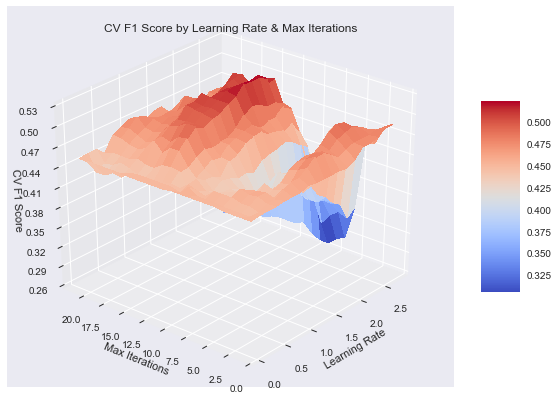

In [22]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = np.array(results[2::3])
X = np.array(results[0::3])
Y = np.array(results[1::3])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by Learning Rate & Max Iterations')
plt.xlabel('Learning Rate')
plt.ylabel('Max Iterations')
ax.view_init(azim=220)

plt.show()

In [132]:
train = []
CV = []
f1 = 0.0
t=0.0

for i in np.linspace(0.1,1,10):
    x_folds, y_folds = size_sample(i)
    t=0.0
    f1 = 0.0
    for a, (f,g) in enumerate(zip(x_folds,y_folds)):

        b = [x for b,x in enumerate(x_folds) if b!=a]
        c = [p for c,p in enumerate(y_folds) if c!=a]
        train_folds = np.vstack(b)
        ytrain_folds = np.hstack(c)


        np.random.seed(1)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                         algorithm ='simulated_annealing', 
                                         max_iters = 13, bias = True, is_classifier = True, 
                                         learning_rate = 1.84, early_stopping = True, 
                                         clip_max = 5, max_attempts = 1)

        nn_model1.fit(train_folds, ytrain_folds)

        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model1.predict(train_folds)

        y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
        y_train_f1 = f1_score(ytrain_folds, y_train_pred)
        t+=y_train_f1
        #print(y_train_accuracy)
        #print(y_train_f1)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(f)

        y_test_accuracy = accuracy_score(g, y_test_pred)
        y_test_f1 = f1_score(g, y_test_pred)
        f1 = f1+y_test_f1
    f1 = f1/5
    t/=5
    #print(f1)
    x_train_folds = np.vstack(x_folds)
    #print(x_train_folds)
    y_train_folds = np.hstack(y_folds)
    #print(y_train_folds)
    np.random.seed(1)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                     algorithm ='simulated_annealing', 
                                     max_iters = 13, bias = True, is_classifier = True, 
                                     learning_rate = 1.84, early_stopping = True, 
                                     clip_max = 5, max_attempts = 1)

    nn_model1.fit(x_train_folds, y_train_folds)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(x_train_folds)
    y_train_f1 = f1_score(y_train_folds, y_train_pred)
    train.append(t)
    CV.append(f1)
CV

[0.4771428571428572,
 0.5190476190476191,
 0.47093406593406595,
 0.5059649122807017,
 0.4284313725490196,
 0.4548962148962149,
 0.46867652146777294,
 0.464321484130518,
 0.4758431650352907,
 0.527918584751212]

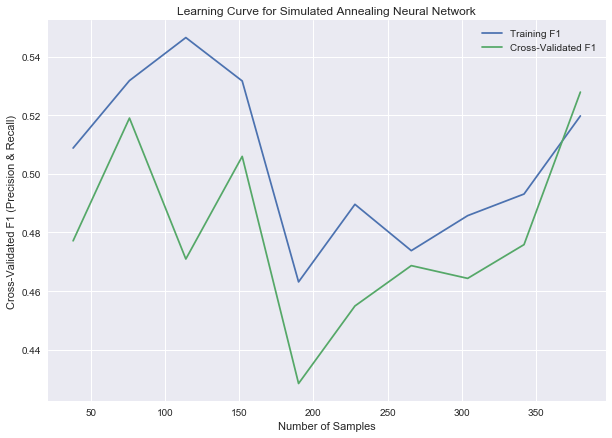

In [133]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [int(ytrain_folds.size * i) for i in np.linspace(0.1,1,10)]
plt.plot(xp, train, label="Training F1")
plt.plot(xp, CV, label="Cross-Validated F1")
plt.title('Learning Curve for Simulated Annealing Neural Network')
plt.xlabel('Number of Samples')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

Hockey - Genetic Algorithms

In [47]:
# Initialize neural network object and fit object - genetic alg with CV

np.random.seed(1)
best = 0.0
f1=0.0
besti = 0
bestj=0
bestk=0
bestl=0
bestm=0
bestn=0
results = []

for i in np.linspace(30,30,1,dtype='int').tolist():
    print(i)
    for j in [0.01]:#np.linspace(0.001,0.001,1):
        
        for k in np.linspace(1,9,5,dtype='int').tolist():
            #print(k)
            for l in np.linspace(4,4,1,dtype='int').tolist():
                print(l)
                for m in np.linspace(1000,1000,1,dtype='int').tolist():
                    print(m)
                    for n in np.linspace(0.2,0.8,4).tolist():
                        
                        f1 = 0
                        for a, (f,g) in enumerate(zip(folds,yfolds)):

                            b = [x for b,x in enumerate(folds) if b!=a]
                            c = [p for c,p in enumerate(yfolds) if c!=a]
                            train_folds = np.vstack(b)
                            ytrain_folds = np.hstack(c)                 
                            
                            np.random.seed(1)
                            nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [i], activation ='relu', 
                                                             algorithm ='genetic_alg', 
                                                             max_iters = k, bias = True, is_classifier = True, 
                                                             learning_rate = j, early_stopping = True, 
                                                             clip_max = 5, max_attempts = l, pop_size=m, mutation_prob=n)

                            nn_model3.fit(train_folds, ytrain_folds)

                            # Predict labels for train set and assess accuracy
                            y_train_pred = nn_model3.predict(train_folds)

                            y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
                            y_train_f1 = f1_score(ytrain_folds, y_train_pred)

                            #print(y_train_accuracy)
                            #print(y_train_f1)

                            # Predict labels for test set and assess accuracy
                            y_test_pred = nn_model3.predict(f)

                            y_test_accuracy = accuracy_score(g, y_test_pred)
                            y_test_f1 = f1_score(g, y_test_pred)
                            f1 = f1+y_test_f1

                        f1 = f1/5
                        results.append(n)
                        results.append(k)
                        results.append(f1)
                        if f1 > best:
                            best = f1
                            besti = i
                            bestj=j
                            bestk=k
                            bestl=l
                            bestm=m
                            bestn=n
print(best)
print(besti)
print(bestj)
print(bestk)
print(bestl)
print(bestm)
print(bestn)

30
4
1000


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

4
1000


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

4
1000


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

4
1000


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

4
1000


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

0.43952331452331456
30
0.01
7
4
1000
0.4


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

In [48]:
print(best)
print(besti)
print(bestj)
print(bestk)
print(bestl)
print(bestm)
print(bestn)

0.43952331452331456
30
0.01
7
4
1000
0.4


In [50]:
np.random.seed(1)
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [besti], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = bestk, bias = True, is_classifier = True, 
                                 learning_rate = bestj, early_stopping = True, 
                                 clip_max = 5, max_attempts = bestl, pop_size=bestm, mutation_prob=bestn)

start_time = timeit.default_timer()
nn_model3.fit(X_train_scale, y_train)
elapsed = timeit.default_timer() - start_time
print(elapsed)

# Predict labels for train set and assess accuracy
y_train_pred = nn_model3.predict(X_train_scale)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_train_f1 = f1_score(y_train, y_train_pred)

print(y_train_accuracy)
print(y_train_f1)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scale)

y_test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_f1 = f1_score(y_test, y_test_pred)

print(y_test_accuracy)
print(y_test_f1)

#create confusion & classification matrix for test data
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred,digits=3))

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

9.215510344018185
0.8126315789473684
0.44720496894409933
0.8095238095238095
0.3846153846153846
[[63  6]
 [10  5]]
              precision    recall  f1-score   support

           0      0.863     0.913     0.887        69
           1      0.455     0.333     0.385        15

   micro avg      0.810     0.810     0.810        84
   macro avg      0.659     0.623     0.636        84
weighted avg      0.790     0.810     0.798        84



C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


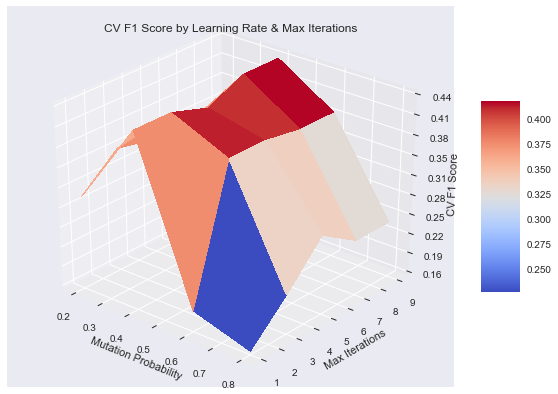

In [57]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = np.array(results[2::3])
X = np.array(results[0::3])
Y = np.array(results[1::3])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by Learning Rate & Max Iterations')
plt.xlabel('Mutation Probability')
plt.ylabel('Max Iterations')
ax.view_init(azim=310)

plt.show()

In [126]:
train = []
CV = []
f1 = 0.0
t=0.0

for i in np.linspace(0.1,1,10):
    x_folds, y_folds = size_sample(i)
    
    f1 = 0.0
    t=0.0
    for a, (f,g) in enumerate(zip(x_folds,y_folds)):

        b = [x for b,x in enumerate(x_folds) if b!=a]
        c = [p for c,p in enumerate(y_folds) if c!=a]
        train_folds = np.vstack(b)
        ytrain_folds = np.hstack(c)


        np.random.seed(1)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                         algorithm ='genetic_alg', 
                                         max_iters = 7, bias = True, is_classifier = True, 
                                         learning_rate = 0.01, early_stopping = True, 
                                         clip_max = 5, max_attempts = 4, pop_size=1000, mutation_prob=0.4)

        nn_model1.fit(train_folds, ytrain_folds)

        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model1.predict(train_folds)

        y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
        y_train_f1 = f1_score(ytrain_folds, y_train_pred)
        t+=y_train_f1
        #print(y_train_accuracy)
        #print(y_train_f1)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(f)

        y_test_accuracy = accuracy_score(g, y_test_pred)
        y_test_f1 = f1_score(g, y_test_pred)
        f1 = f1+y_test_f1
    f1 = f1/5
    t/=5
    #print(f1)
    x_train_folds = np.vstack(x_folds)
    #print(x_train_folds)
    y_train_folds = np.hstack(y_folds)
    #print(y_train_folds)
    np.random.seed(1)
    np.random.seed(1)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                     algorithm ='genetic_alg', 
                                     max_iters = 7, bias = True, is_classifier = True, 
                                     learning_rate = 0.01, early_stopping = True, 
                                     clip_max = 5, max_attempts = 4, pop_size=1000, mutation_prob=0.4)

    nn_model1.fit(x_train_folds, y_train_folds)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(x_train_folds)
    y_train_f1 = f1_score(y_train_folds, y_train_pred)
    train.append(t)
    CV.append(f1)
CV

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

[0.5066666666666666,
 0.47428571428571437,
 0.3897435897435897,
 0.3392857142857143,
 0.16487179487179487,
 0.32315135665250083,
 0.2604408939225402,
 0.24788695877625097,
 0.250776809397499,
 0.43952331452331456]

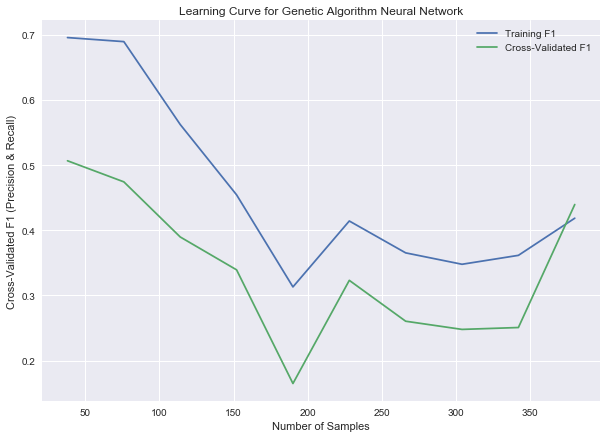

In [127]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [int(ytrain_folds.size * i) for i in np.linspace(0.1,1,10)]
plt.plot(xp, train, label="Training F1")
plt.plot(xp, CV, label="Cross-Validated F1")
plt.title('Learning Curve for Genetic Algorithm Neural Network')
plt.xlabel('Number of Samples')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

Hockey - Gradient Descent (for Benchmarking)

In [118]:
# Initialize neural network object and fit object - attempt 1

np.random.seed(1)
best = 0.0
f1 = 0.0
besti = 0
bestj=0
bestk=0
bestl=0
results = []

for i in np.linspace(28,28,1,dtype='int').tolist():
    print(i)
    for j in np.linspace(0.005,0.05,10):
        print(j)
        for k in np.linspace(50,500,10,dtype='int').tolist():
            
            for l in np.linspace(5,5,1,dtype='int').tolist():
                f1 = 0
                for a, (f,g) in enumerate(zip(folds,yfolds)):

                    b = [x for b,x in enumerate(folds) if b!=a]
                    c = [p for c,p in enumerate(yfolds) if c!=a]
                    train_folds = np.vstack(b)
                    ytrain_folds = np.hstack(c)  
                
                    np.random.seed(1)
                    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [i], activation ='sigmoid', 
                                                     algorithm ='gradient_descent', 
                                                     max_iters = k, bias = True, is_classifier = True, 
                                                     learning_rate = j, early_stopping = True, 
                                                     clip_max = 5, max_attempts = l)

                    nn_model2.fit(train_folds, ytrain_folds)

                    # Predict labels for train set and assess accuracy
                    y_train_pred = nn_model2.predict(train_folds)

                    y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
                    y_train_f1 = f1_score(ytrain_folds, y_train_pred)

                    #print(y_train_accuracy)
                    #print(y_train_f1)

                    # Predict labels for test set and assess accuracy
                    y_test_pred = nn_model2.predict(f)

                    y_test_accuracy = accuracy_score(g, y_test_pred)
                    y_test_f1 = f1_score(g, y_test_pred)
                    f1 = f1+y_test_f1

                f1 = f1/5
                results.append(j)
                results.append(k)
                results.append(f1)
                if f1 > best:
                    best = f1
                    besti = i
                    bestj=j
                    bestk=k
                    bestl=l
print(best)
print(besti)
print(bestj)
print(bestk)
print(bestl)

28
0.005
0.010000000000000002
0.015000000000000003
0.020000000000000004
0.025000000000000005


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

0.030000000000000006


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

0.035


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.04


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.045000000000000005


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

0.05


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

0.5017408105393725
28
0.020000000000000004
250
5


In [119]:
np.random.seed(1)
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [besti], activation ='sigmoid', 
                                 algorithm ='gradient_descent', 
                                 max_iters = bestk, bias = True, is_classifier = True, 
                                 learning_rate = bestj, early_stopping = True, 
                                 clip_max = 5, max_attempts = bestl)

start_time = timeit.default_timer()
nn_model2.fit(X_train_scale, y_train)
elapsed = timeit.default_timer() - start_time
print(elapsed)

# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scale)

y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_train_f1 = f1_score(y_train, y_train_pred)

print(y_train_accuracy)
print(y_train_f1)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scale)

y_test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_f1 = f1_score(y_test, y_test_pred)

print(y_test_accuracy)
print(y_test_f1)

#create confusion & classification matrix for test data
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred,digits=3))

0.24556087566816132
0.8126315789473684
0.0
0.8214285714285714
0.0
[[69  0]
 [15  0]]
              precision    recall  f1-score   support

           0      0.821     1.000     0.902        69
           1      0.000     0.000     0.000        15

   micro avg      0.821     0.821     0.821        84
   macro avg      0.411     0.500     0.451        84
weighted avg      0.675     0.821     0.741        84



C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


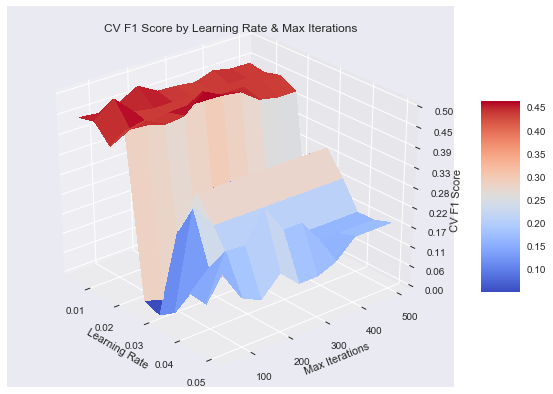

In [92]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = np.array(results[2::3])
X = np.array(results[0::3])
Y = np.array(results[1::3])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by Learning Rate & Max Iterations')
plt.xlabel('Learning Rate')
plt.ylabel('Max Iterations')
ax.view_init(azim=320)

plt.show()

In [128]:
train = []
CV = []
f1 = 0.0
t = 0.0

for i in np.linspace(0.1,1,10):
    x_folds, y_folds = size_sample(i)
    
    f1 = 0.0
    t=0.0
    for a, (f,g) in enumerate(zip(x_folds,y_folds)):

        b = [x for b,x in enumerate(x_folds) if b!=a]
        c = [p for c,p in enumerate(y_folds) if c!=a]
        train_folds = np.vstack(b)
        ytrain_folds = np.hstack(c)


        np.random.seed(1)
        nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [28], activation ='sigmoid', 
                                         algorithm ='gradient_descent', 
                                         max_iters = 250, bias = True, is_classifier = True, 
                                         learning_rate = 0.02, early_stopping = True, 
                                         clip_max = 5, max_attempts = 5)

        nn_model4.fit(train_folds, ytrain_folds)

        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model4.predict(train_folds)

        y_train_accuracy = accuracy_score(ytrain_folds, y_train_pred)
        y_train_f1 = f1_score(ytrain_folds, y_train_pred)
        t+=y_train_f1
        #print(y_train_accuracy)
        #print(y_train_f1)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model4.predict(f)

        y_test_accuracy = accuracy_score(g, y_test_pred)
        y_test_f1 = f1_score(g, y_test_pred)
        f1 = f1+y_test_f1
    f1 = f1/5
    t/=5
    #print(f1)
    x_train_folds = np.vstack(x_folds)
    #print(x_train_folds)
    y_train_folds = np.hstack(y_folds)
    #print(y_train_folds)
    np.random.seed(1)
    np.random.seed(1)
    nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [28], activation ='sigmoid', 
                                     algorithm ='gradient_descent', 
                                     max_iters = 250, bias = True, is_classifier = True, 
                                     learning_rate = 0.02, early_stopping = True, 
                                     clip_max = 5, max_attempts = 5)

    nn_model4.fit(x_train_folds, y_train_folds)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model4.predict(x_train_folds)
    y_train_f1 = f1_score(y_train_folds, y_train_pred)
    train.append(t)
    CV.append(f1)
CV

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.4733333333333333,
 0.44571428571428573,
 0.4847319347319347,
 0.45496012759170645,
 0.38537520271266396,
 0.42164460987041635,
 0.4843423423423424,
 0.3189962939528157,
 0.35021245421245417,
 0.5017408105393725]

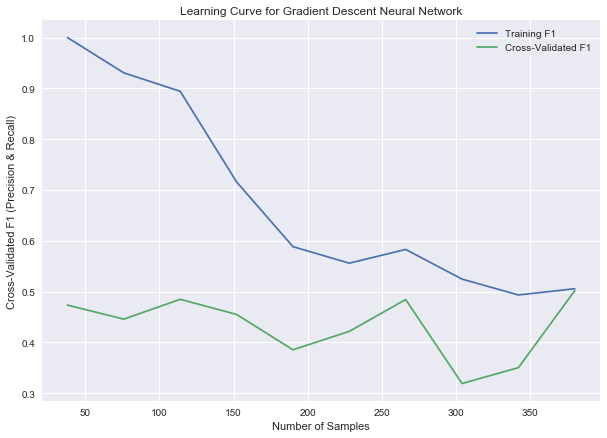

In [129]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [int(ytrain_folds.size * i) for i in np.linspace(0.1,1,10)]
plt.plot(xp, train, label="Training F1")
plt.plot(xp, CV, label="Cross-Validated F1")
plt.title('Learning Curve for Gradient Descent Neural Network')
plt.xlabel('Number of Samples')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

Hockey - Benchmarking Iterations

In [97]:
xp = [1,7,13,25,50,75,100,250,320,500]
results = []
f1=0.0
f2=0.0
f3=0.0
f4=0.0

for i in xp:
    
    f1 = 0
    f2=0
    f3=0
    f4=0
    for a, (f,g) in enumerate(zip(folds,yfolds)):

        b = [x for b,x in enumerate(folds) if b!=a]
        c = [p for c,p in enumerate(yfolds) if c!=a]
        train_folds = np.vstack(b)
        ytrain_folds = np.hstack(c)  
                
                   
        #Random Hill
        np.random.seed(1)
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                                         algorithm ='random_hill_climb', 
                                                         max_iters = i, bias = True, is_classifier = True, 
                                                         learning_rate = 1.513375, early_stopping = True, 
                                                         clip_max = 5, max_attempts = 18)

        nn_model1.fit(train_folds, ytrain_folds)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(f)
        y_test_f1 = f1_score(g, y_test_pred)
        f1 = f1+y_test_f1

        #Simulated Annealing
        np.random.seed(1)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                         algorithm ='simulated_annealing', 
                                         max_iters = i, bias = True, is_classifier = True, 
                                         learning_rate = 1.84, early_stopping = True, 
                                         clip_max = 5, max_attempts = 1)

        nn_model2.fit(train_folds, ytrain_folds)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(f)
        y_test_f1 = f1_score(g, y_test_pred)
        f2 = f2+y_test_f1

        #Genetic Algorithm
        np.random.seed(1)
        nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                         algorithm ='genetic_alg', 
                                         max_iters = i, bias = True, is_classifier = True, 
                                         learning_rate = 0.01, early_stopping = True, 
                                         clip_max = 5, max_attempts = 4, pop_size=1000, mutation_prob=0.4)

        nn_model3.fit(train_folds, ytrain_folds)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model3.predict(f)
        y_test_f1 = f1_score(g, y_test_pred)
        f3 = f3+y_test_f1

        #Gradient Descent
        np.random.seed(1)
        nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [28], activation ='sigmoid', 
                                         algorithm ='gradient_descent', 
                                         max_iters = i, bias = True, is_classifier = True, 
                                         learning_rate = 0.02, early_stopping = True, 
                                         clip_max = 5, max_attempts = 5)

        nn_model4.fit(train_folds, ytrain_folds)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model4.predict(f)
        y_test_f1 = f1_score(g, y_test_pred)
        f4 = f4+y_test_f1
    f1=f1/5
    f2=f2/5
    f3=f3/5
    f4=f4/5
    results.append(f1)
    results.append(f2)
    results.append(f3)
    results.append(f4)

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
C:\Users\e4129\AppData\Local

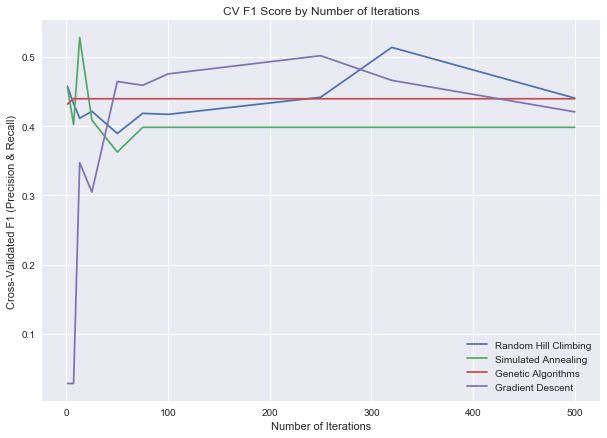

In [98]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = xp = [1,7,13,25,50,75,100,250,320,500]
plt.plot(xp, results[0::4], label="Random Hill Climbing")
plt.plot(xp, results[1::4], label="Simulated Annealing")
plt.plot(xp, results[2::4], label="Genetic Algorithms")
plt.plot(xp, results[3::4], label="Gradient Descent")
plt.title('CV F1 Score by Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

# **Part 2 - Optimization Problems**

---


 **50 Queens Problem**
___

In [2]:
#import packages
import mlrose
import numpy as np

In [277]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):

               # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [278]:
#initialize problem object
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness_cust, maximize = True, max_val = 50)

In [290]:
#Solve Using Hill Climbing
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 200, max_iters = 1000)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

1.2179555579720613
[37 43 20 15 26 11  5 34  0 16 24 12  7 45 40 31 46 28 18 48 11 29 39 48
 14  4  1 21 41 49 10 32 19  2 36 33  7 22  9  0 17 19 24 13 47 42 30 35
 16  3]
1216.0


In [291]:
#Solve Using Simulated Annealing
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 75, max_iters = 2500)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\algorithms.py:241: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


1.6511144866844347
[35 33 27 37  8 26  6 36 41 19  4 14 39 11 45  1 46 29  9  3 22  0 11 40
 47 49 44 28 20 38 43 30  7 18 16 12 32 48 43 15  5 34  2 21 13 42  7  5
 31 17]
1219.0


In [292]:
#Solve Using Genetic Algorithm
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.genetic_alg(problem, pop_size = 100, mutation_prob=0.1, max_attempts=15, max_iters = 30)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

3.7794047739064354
[48  1 44 39 25 39 16 31 42 12 13 29 38 24  5  4 35 18 43  2 42 37 49  2
  9 23 41 15 32 47 26 40 25 19 15 30 49 36 28 31  9 26 21 43 46  5 47 29
 27 13]
1190.0


In [293]:
#Solve Using MIMIC
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.mimic(problem, pop_size = 300, keep_pct=0.15, max_attempts=5, max_iters = 15)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

8.210383550461302
[18  9 46 22 20 33 47 24  9 14 23 45 36 23 39 37  6 43  1 19 29 48 45  8
 34 29  0 15 19  4  7  1  8 26 40 25 32  6 32  7 38 17 29 38  3 10 27 14
 49 43]
1197.0


In [275]:
iterations = [1,3,5,10,15,30,50,100,250,500,1000,2500,5000]
results = []

for i in iterations:
    np.random.seed(1)
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 200, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 75, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size = 100, mutation_prob=0.1, max_attempts=15, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.mimic(problem, pop_size = 300, keep_pct=0.15, max_attempts=5, max_iters = i)
    results.append(best_fitness)

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\mlrose\algorithms.py:241: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


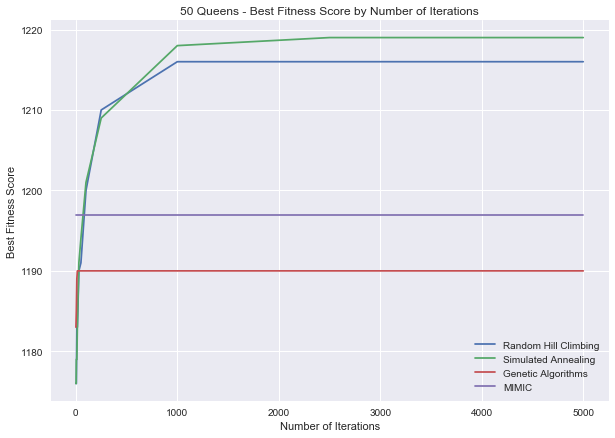

In [276]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [1,3,5,10,15,30,50,100,250,500,1000,2500,5000]
plt.plot(xp, results[0::4], label="Random Hill Climbing")
plt.plot(xp, results[1::4], label="Simulated Annealing")
plt.plot(xp, results[2::4], label="Genetic Algorithms")
plt.plot(xp, results[3::4], label="MIMIC")
plt.title('50 Queens - Best Fitness Score by Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Score')
plt.legend()

**NHL Road-Trip Traveling Salesman Problem**
___

In [60]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 15.9869581568218), 
            (0, 2, 18.3611330782082), 
            (0, 3, 19.6599612713374), 
            (0, 4, 15.3382452132815), 
            (0, 5, 3.15627321480334), 
            (0, 6, 14.3795107039702), 
            (0, 7, 18.7183607261409), 
            (0, 8, 15.2717066227356), 
            (0, 9, 12.1946796889674), 
            (0, 10, 11.9959768709362), 
            (0, 11, 12.716040741269), 
            (0, 12, 8.70126542551122), 
            (0, 13, 14.0295517933016), 
            (0, 14, 15.3311726109716), 
            (0, 15, 15.2208290309381), 
            (1, 2, 8.42696045785602), 
            (1, 3, 6.10342058499273), 
            (1, 4, 0.924209665448813), 
            (1, 5, 17.910420840123), 
            (1, 6, 3.89297316161325), 
            (1, 7, 4.08998595077355), 
            (1, 8, 6.20926922209466), 
            (1, 9, 5.3120248043473), 
            (1, 10, 5.14844673535562), 
            (1, 11, 3.27096965878331), 
            (1, 12, 7.90089900508297), 
            (1, 13, 5.61251876243332), 
            (1, 14, 6.12319343080561), 
            (1, 15, 5.97330756146885), 
            (2, 3, 4.02048194811443), 
            (2, 4, 7.83886064273692), 
            (2, 5, 18.9468896914009), 
            (2, 6, 11.988706828076), 
            (2, 7, 5.55631909970944), 
            (2, 8, 3.36109532412351), 
            (2, 9, 6.91312126010719), 
            (2, 10, 12.144451212803), 
            (2, 11, 9.1427914631947), 
            (2, 12, 10.0386664034562), 
            (2, 13, 4.76213995501654), 
            (2, 14, 3.34908036145596), 
            (2, 15, 3.51385553438726), 
            (3, 4, 5.9231308096938), 
            (3, 5, 20.8219019364226), 
            (3, 6, 9.99458300714192), 
            (3, 7, 2.12967462218668), 
            (3, 8, 4.86676797032825), 
            (3, 9, 7.46647653442639), 
            (3, 10, 10.9107397623216), 
            (3, 11, 8.18176227664431), 
            (3, 12, 10.9606775784026), 
            (3, 13, 5.77460424598717), 
            (3, 14, 4.77046301884628), 
            (3, 15, 4.80429673436373), 
            (4, 5, 17.1688147866049), 
            (4, 6, 4.20299851865618), 
            (4, 7, 4.07253626908171), 
            (4, 8, 5.40984332278348), 
            (4, 9, 4.39595250294131), 
            (4, 10, 5.02429895708973), 
            (4, 11, 2.68322596099098), 
            (4, 12, 7.0963619682574), 
            (4, 13, 4.72877553272145), 
            (4, 14, 5.32952908576545), 
            (4, 15, 5.17195891253536), 
            (5, 6, 16.8137136546228), 
            (5, 7, 20.1662734736834), 
            (5, 8, 16.1437802615748), 
            (5, 9, 13.5019385233062), 
            (5, 10, 14.4551799368636), 
            (5, 11, 14.6802313098098), 
            (5, 12, 10.1447734116982), 
            (5, 13, 15.0548213775446), 
            (5, 14, 16.2197156179811), 
            (5, 15, 16.1385566279893), 
            (6, 7, 7.97299358036566), 
            (6, 8, 9.24986345671465), 
            (6, 9, 6.92623960808821), 
            (6, 10, 2.38357146267214), 
            (6, 11, 3.58842863468818), 
            (6, 12, 7.88625345171027), 
            (6, 13, 8.23174812136991), 
            (6, 14, 9.18947474229088), 
            (6, 15, 9.01573837065406), 
            (7, 8, 5.07960471651614), 
            (7, 9, 6.66685650741352), 
            (7, 10, 9.09394897092418), 
            (7, 11, 6.57961671189454), 
            (7, 12, 10.0738318868953), 
            (7, 13, 5.49337802109349), 
            (7, 14, 4.97053177932845), 
            (7, 15, 4.92602478232702), 
            (8, 9, 3.55223626428269), 
            (8, 10, 9.03685676788129), 
            (8, 11, 6.04951544594813), 
            (8, 12, 6.75852347267367), 
            (8, 13, 1.40112992337828), 
            (8, 14, 0.109254366251425), 
            (8, 15, 0.238292712815571), 
            (9, 10, 6.01844699004028), 
            (9, 11, 3.3423415252933), 
            (9, 12, 3.49422532952899), 
            (9, 13, 2.15111341563782), 
            (9, 14, 3.56596591132221), 
            (9, 15, 3.40655794654282), 
            (10, 11, 3.00419856273599), 
            (10, 12, 5.99517853930148), 
            (10, 13, 7.79443464462022), 
            (10, 14, 9.00202901114237), 
            (10, 15, 8.82239751401992), 
            (11, 12, 4.84522527446578), 
            (11, 13, 4.85525674102173), 
            (11, 14, 6.0105467771553), 
            (11, 15, 5.83099373149328), 
            (12, 13, 5.42674642459227), 
            (12, 14, 6.80133295012926), 
            (12, 15, 6.66930947689729), 
            (13, 14, 1.41763681654682), 
            (13, 15, 1.26450539079792), 
            (14, 15, 0.179636639920705)]
NHLCities = ['Tampa Bay', 
                'Toronto ', 
                'Boston', 
                'Montreal', 
                'Buffalo', 
                'Miami', 
                'Detroit', 
                'Ottawa', 
                'Brooklyn', 
                'Washington DC', 
                'Columbus', 
                'Pittsburgh', 
                'Raleigh', 
                'Philadelphia', 
                'Manhattan', 
                'Newark']

NHLDict = {i:x for i,x in enumerate(NHLCities)}

# Initialize fitness function object using dist_list
fitness_dists = mlrose.TravellingSales(distances = dist_list)

In [65]:
# Define optimization problem object
problem_fit2 = mlrose.TSPOpt(length = 16, fitness_fn = fitness_dists, maximize = True)

In [92]:
# Solve using random hill climbing
np.random.seed(1)

best_state, best_fitness = mlrose.random_hill_climb(problem_fit2, max_attempts = 350, max_iters = 2000)
print(best_state)
for i in best_state:
    print(NHLDict[i])
print(best_fitness)

[ 1  9  2 10 14 11 15 12  3  0  7  5  4  8  6 13]
Toronto 
Washington DC
Boston
Columbus
Manhattan
Pittsburgh
Newark
Raleigh
Montreal
Tampa Bay
Ottawa
Miami
Buffalo
Brooklyn
Detroit
Philadelphia
167.06053777341629


In [81]:
#Solve Using Simulated Annealing
# Set random seed
np.random.seed(1)

# Solve problem using simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem_fit2, max_attempts = 400, max_iters = 3000)
print(best_state)
for i in best_state:
    print(NHLDict[i])
print(best_fitness)

[12 15  1  9  2 10 14 11  8  6 13  4  5  7  0  3]
Raleigh
Newark
Toronto 
Washington DC
Boston
Columbus
Manhattan
Pittsburgh
Brooklyn
Detroit
Philadelphia
Buffalo
Miami
Ottawa
Tampa Bay
Montreal
166.95878049684464


In [89]:
##### Solve using genetic algorithm
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 250)
print(best_state)
print(best_fitness)

[ 6  2 10 14  1 12  3  9  8  4  0  7  5 15 11 13]
163.8279478227851


In [84]:
#Solve Using MIMIC
# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.mimic(problem_fit2, pop_size = 200, keep_pct=0.7, max_attempts=250, max_iters = 1000)
print(best_state)
print(best_fitness)

[14  4  8  9  1 12 15  5  3  0  7 10  2 11 13  6]
162.1702937726538


**Four Peaks Problem**
___

In [376]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FourPeaks(t_pct=0.3)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize=True, max_val=2)

In [378]:
# Solve using random hill climbing
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = 250)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.009419510890438687
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
30.0


In [332]:
# Solve using simulated annealing - attempt 1
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 80, max_iters = 450)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.022899526855326258
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
30.0


In [316]:
##### Solve using genetic algorithm
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.genetic_alg(problem, mutation_prob = 0.01, max_attempts = 4, max_iters = 13)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.22049252408760367
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
50.0


In [298]:
#Solve Using MIMIC
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.mimic(problem, pop_size = 600, keep_pct=0.03, max_attempts=1, max_iters = 3)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.866171733613669
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
50.0


In [268]:
iterations = [1,3,5,10,25,50,75,100,150,200,250,350,500]
results = []

for i in iterations:
    np.random.seed(1)
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 450, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 100, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.genetic_alg(problem, mutation_prob = 0.01, max_attempts = 2500, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.mimic(problem, pop_size = 600, keep_pct=0.03, max_attempts=1, max_iters = i)
    results.append(best_fitness)

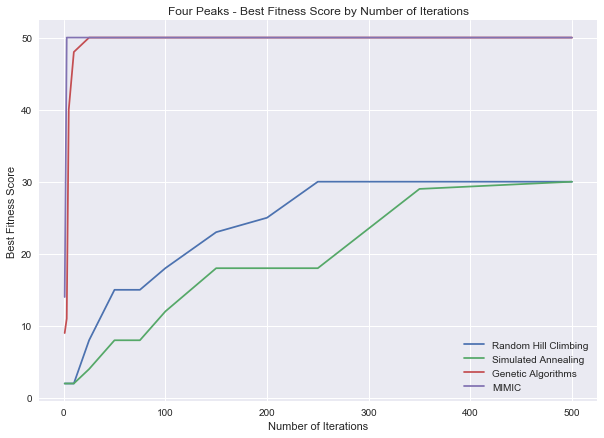

In [269]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [1,3,5,10,25,50,75,100,150,200,250,350,500]
plt.plot(xp, results[0::4], label="Random Hill Climbing")
plt.plot(xp, results[1::4], label="Simulated Annealing")
plt.plot(xp, results[2::4], label="Genetic Algorithms")
plt.plot(xp, results[3::4], label="MIMIC")
plt.title('Four Peaks - Best Fitness Score by Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Score')
plt.legend()

**Knapsack Problem**
___

In [379]:
# Initialize fitness function object using pre-defined class
weights = [23,14,8,35,27,84,18,5,2,40,29,7,16,51,22,59,15,10,28,41]
values = [10,5,1,9,2,8,10,1,2,6,3,9,2,6,9,2,4,8,5,7]
fitness = mlrose.Knapsack(weights, values, max_weight_pct=0.5)
print(sum(weights)*0.5)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=4)

267.0


In [337]:
# Solve using random hill climbing
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters = 25000)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.06465166839916492
[1 3 0 0 3 1 3 1 3 0 0 1 0 3 1 0 2 1 2 0]
0.0


In [357]:
# Solve using simulated annealing - attempt 1
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 9, max_iters = 70)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

0.007158178836107254
[2 3 0 0 1 0 3 2 3 0 0 1 1 0 0 0 0 3 1 0]
115.0


In [380]:
##### Solve using genetic algorithm
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.genetic_alg(problem, mutation_prob = 0.01, max_attempts = 90, max_iters=300)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

print(sum([a*b for a,b in zip(weights,best_state)]))

4.7927061941009015
[2 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 3 0 0]
149.0
265


In [375]:
#Solve Using MIMIC
start_time = timeit.default_timer()
np.random.seed(1)
best_state, best_fitness = mlrose.mimic(problem, pop_size = 10000, keep_pct=0.1, max_attempts=15, max_iters = 15)
elapsed = timeit.default_timer() - start_time
print(elapsed)
print(best_state)
print(best_fitness)

8.163049252791097
[1 1 0 1 0 0 3 0 3 0 0 3 1 0 0 0 1 3 0 0]
117.0


In [271]:
iterations = [1,3,5,10,25,50,75,100,150,200,250]
results = []

for i in iterations:
    np.random.seed(1)
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 200, max_iters = i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.genetic_alg(problem, mutation_prob = 0.01, max_attempts = 100, max_iters=i)
    results.append(best_fitness)
    np.random.seed(1)
    best_state, best_fitness = mlrose.mimic(problem, pop_size = 10000, keep_pct=0.1, max_attempts=20, max_iters = i)
    results.append(best_fitness)

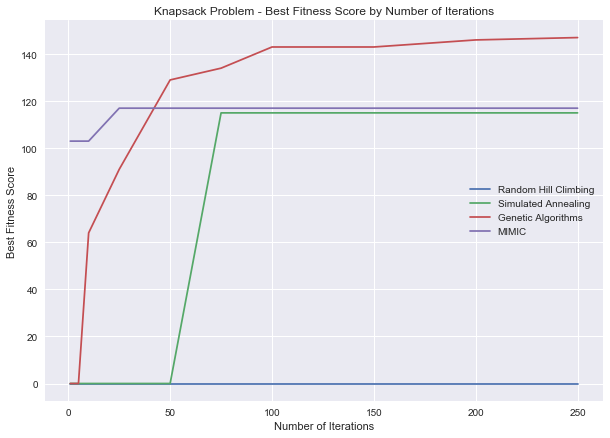

In [272]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [1,3,5,10,25,50,75,100,150,200,250]
plt.plot(xp, results[0::4], label="Random Hill Climbing")
plt.plot(xp, results[1::4], label="Simulated Annealing")
plt.plot(xp, results[2::4], label="Genetic Algorithms")
plt.plot(xp, results[3::4], label="MIMIC")
plt.title('Knapsack Problem - Best Fitness Score by Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Score')
plt.legend()